In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SEED = 42

In [18]:
def caminata_aleatoria(num_pasos, prob = 0.5, d_x = 1, d_y = 1):
    rng = np.random.default_rng()
    volados = rng.choice(
        np.array([-1, 1]),
        size=num_pasos,
        replace=True,
        p=np.array([prob, 1-prob])
    )
    caminata = np.zeros(num_pasos)
    caminata[0] = volados[0]
    for i in range(1, num_pasos):
        caminata[i] = caminata[i-1] + volados[i]
    
    return caminata 

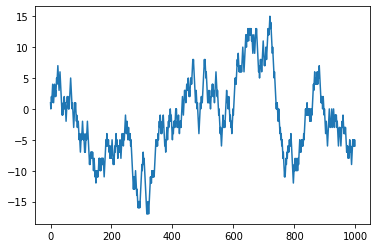

In [13]:
plt.plot(caminata_aleatoria(1_000))

In [22]:
caminatas = [caminata_aleatoria(100) for _ in range(100)]

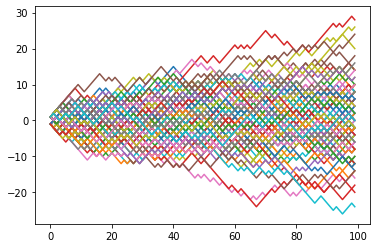

In [23]:
for caminata in caminatas:
    plt.plot(caminata)

(array([ 2.,  5.,  7., 17., 24., 17., 18.,  5.,  2.,  3.]),
 array([-24. , -18.8, -13.6,  -8.4,  -3.2,   2. ,   7.2,  12.4,  17.6,
         22.8,  28. ]),
 <a list of 10 Patch objects>)

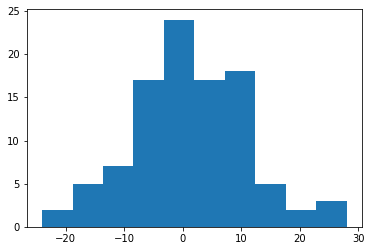

In [24]:
sample = [caminata[99] for caminata in caminatas]

plt.hist(sample)